# Video Games Sales
## by Omer Alabas

## Investigation Overview

> My main goal in this presentation is to show which gaming platform has the most supported games in that platform. Diffrent games generations has been taken into consideration in this investigation. Also I want to show which region has the most games sales in the golbe.

## Dataset Overview

> This dataset was taken from kaggle.com. It contains a list of video games that sold more than 100,000 copies. It was generated by a scrape of vgchartz.com. It has more than 16,500 rows in total with each raw represting a game with the sales of that according to each region. It satisfies all Udacity rules for choosing a personal dataset. This data was last updated in 2017.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_games_sales = pd.read_csv('vgsales.csv') 
df_old_gen = df_games_sales[df_games_sales.Year <= 2007]
df_new_gen = df_games_sales[df_games_sales.Year > 2007]
# Change size
sb.set(rc={'figure.figsize':(10,8)})
# Changing the type of year
df_games_sales.Year = df_games_sales.Year.fillna(df_games_sales.Year.mean()).astype(int)

In [3]:
#this function is used to add labels and title to the plot, and to set it to grid or not
def insert_labels_title(xlabel, ylabel, title, grid, legends):
    if(legends):
        plt.legend()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(grid)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## What is the plaform with the most games?

> The figure below shows that DS (Nintendo DS) and PS2 (Playstation 2) have the most games in this dataset. However this could be misleading since the dataset has records that goes back to 1980! So it would make sense that older platforms have more supporting games than newer ones.<br/>
To solve this issue we will separate our data set into two dataframes, df_old_gen and df_new_gen. We will take 2007 as our breaking point (since 2007 is the median of the data).

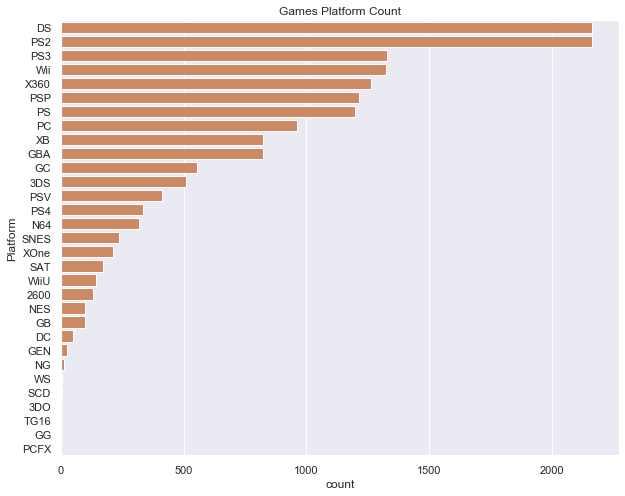

In [4]:
# setting basic parameters
color = sb.color_palette()[1]
plat_counts = df_games_sales.Platform.value_counts()
plat_order = plat_counts.index

# plotting a seaborn bar-chart
sb.countplot(data=df_games_sales, y='Platform', color=color, order = plat_order);

plt.title('Games Platform Count');

## What is the plaform with the most games from 1980 to 2007?

> We can see in the graph below that PS2 is the platform with the most games by far, followed by PS1. Looks like Sony was mass producing games in this period of time.

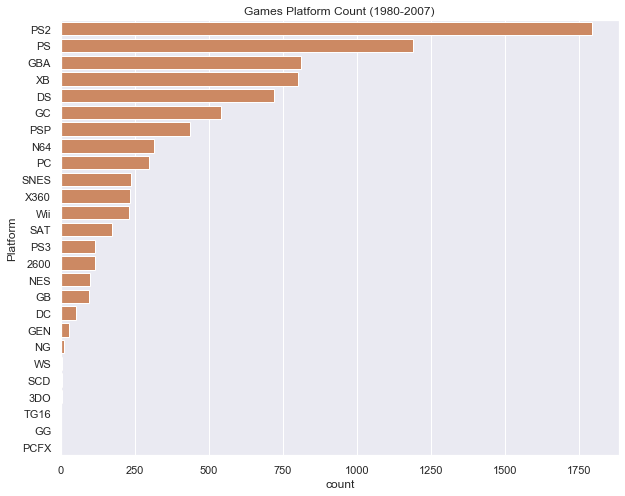

In [5]:
# setting basic parameters
color = sb.color_palette()[1]
plat_counts = df_old_gen.Platform.value_counts()
plat_order = plat_counts.index

# plotting a seaborn bar-chart
sb.countplot(data=df_old_gen, y='Platform', color=color, order = plat_order);

plt.title('Games Platform Count (1980-2007)');

## What is the plaform with the most games from 2007 to 2017?

> We can see in the graph below that DS is the platform with the most games followed by PS3 follwed by Wii. I did not expect Nintendo to produse this huge amount of games!

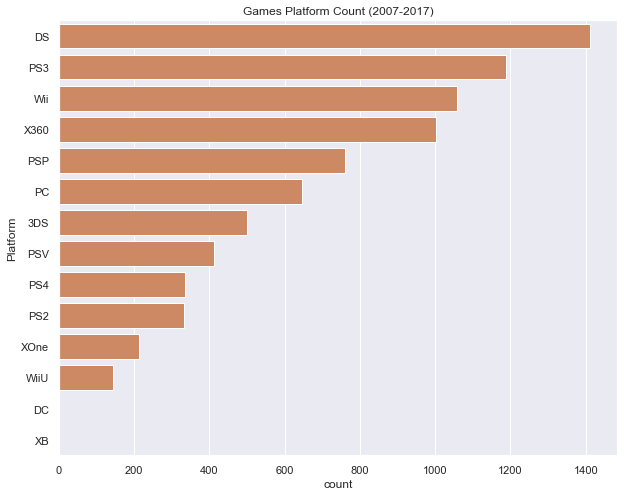

In [6]:
# setting basic parameters
color = sb.color_palette()[1]
plat_counts = df_new_gen.Platform.value_counts()
plat_order = plat_counts.index

# plotting a seaborn bar-chart
sb.countplot(data=df_new_gen, y='Platform', color=color, order = plat_order);

plt.title('Games Platform Count (2007-2017)');

## What region have the most sales?

> From the below graph it apears that North America has the most sales. It contributes to almost half of the global sales! Europe comes second with 27.3% of the global sales. Finally Japan and other regions come last.

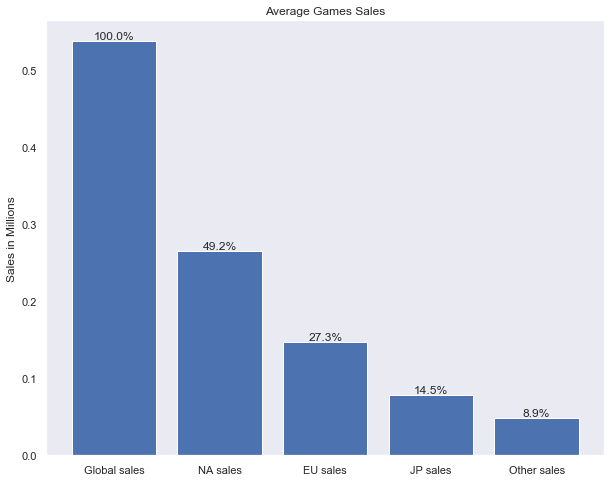

In [7]:
# The mean sales for every region
NA_Sales = df_games_sales['NA_Sales'].mean()
EU_Sales = df_games_sales['EU_Sales'].mean()
JP_Sales = df_games_sales['JP_Sales'].mean()
Other_Sales = df_games_sales['Other_Sales'].mean()
Global_Sales = df_games_sales['Global_Sales'].mean()

# plotting
bar = plt.bar([1, 2, 3, 4, 5], [Global_Sales, NA_Sales ,EU_Sales , JP_Sales, Other_Sales])
plt.xticks([1, 2, 3, 4, 5], ['Global sales','NA sales', 'EU sales', 'JP sales','Other sales']);
insert_labels_title('','Sales in Millions','Average Games Sales',False,False)

x_labels = [Global_Sales, NA_Sales ,EU_Sales , JP_Sales, Other_Sales]

# printing the sales above the bars
for rect,label in zip(bar,x_labels):
    height = rect.get_height()
    text = '{:0.1f}%'.format(100*label/Global_Sales)
    plt.text(rect.get_x() + rect.get_width()/2.0, height, text, ha='center', va='bottom')

## What is the genre with the most games?

> Action is the most common game genre according to this dataset. This is no surprise since most people love Action games and movies. 

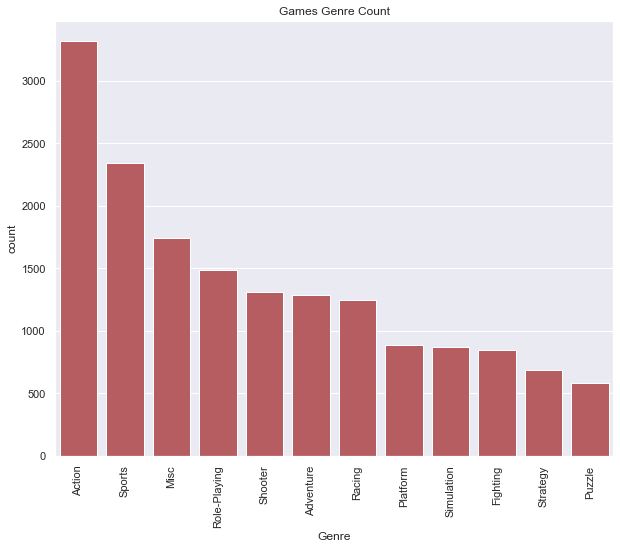

In [8]:
# setting basic parameters
color = sb.color_palette()[3]
plat_counts = df_games_sales.Genre.value_counts()
plat_order = plat_counts.index

# plotting
sb.countplot(data=df_games_sales, x='Genre', color=color, order = plat_order);
plt.xticks(rotation=90)

# to change the size
sb.set(rc={'figure.figsize':(10,8)})
plt.title('Games Genre Count');

## The change of sales over time

> This is very intresting! According to the graph, the old generation apears to have higher sales than recent years! There has to be a reason for that. My guess is that sincne in recent years the games are more, then maybe many games with low sales are bringing the mean of sales down. Also you can see the long range of data in old years meaning that the data is scattared.

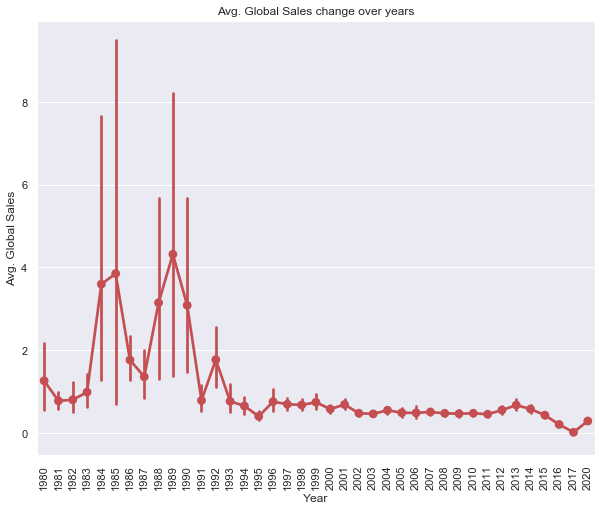

In [9]:
# Plotting a time based graph
sb.pointplot(data=df_games_sales, x='Year', y='Global_Sales', color=color)
plt.xticks(rotation=90)
# Polishing the graph
plt.title('Avg. Global Sales change over years')
plt.ylabel('Avg. Global Sales');

In [10]:
#this function is used to add labels and title to the plot, and to set it to grid or not
def insert_labels_title(xlabel, ylabel, title, grid, legends):
    if(legends):
        plt.legend()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(grid)

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [3]:
!jupyter nbconvert P5_slides.ipynb --to slides --post serve  --no-input --no-prompt

[NbConvertApp] Converting notebook P5_slides.ipynb to slides
[NbConvertApp] Writing 754064 bytes to P5_slides.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\a\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\a\Anaconda3\lib\site-packages\jupyter_core\application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\a\Anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\a\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\Users\a\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 524, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\Users\a\Anaconda3\lib\site-packages